# Bank Customer Churn Machine Learning Project

The purpose of this notebook is to analyse [Bank Customer Data](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data) and predict customer churn. Customer retention should be key factory to stay competitive in the market. For banks, it can help to identify `big profile` customers and avoid them from churning.

# Data and Libraries import

### Libraries for data import and EDA stage

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
%matplotlib inline

### Importing dataset

In [2]:
bank_churn_data = pd.read_csv("Bank Customer Churn Prediction.csv")
bank_churn_data.shape

(10000, 12)

As it was in Kaggles description, there are total **12** columns and **10000** rows of data. Upload was successful.

Let's check some information about the data types each column holds

In [3]:
bank_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


One thing that we can notice straight away, there is no `null-values`. It means we will not have to impute missing values in this case. There still might be some data manipulation if there are outliers or data that is not feasible.

In [4]:
bank_churn_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
credit_score,10000.0,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.0,38.92,10.49,18.00,32.00,37.00,44.00,92.00
tenure,10000.0,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,10000.0,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
products_number,10000.0,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
active_member,10000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.0,100090.24,57510.49,11.58,51002.11,100193.92,149388.25,199992.48
churn,10000.0,0.20,0.40,0.00,0.00,0.00,0.00,1.00


We can already indicate, that `customer_id` can be dropped (after check of dublicating IDs), remaining columns will have to be investigated for outliers.

In [5]:
bank_churn_data["customer_id"].duplicated().sum()

np.int64(0)

In [6]:
bank_churn_data = bank_churn_data.drop(columns=["customer_id"])

Let's check the object columns and frequency values appear.

In [7]:
bank_churn_data.describe(include=["object"]).T

,count,unique,top,freq
country,10000,3,France,5014
gender,10000,2,Male,5457


For gender, it is clear that `Male`/`Female` are the options, but for country we can currently see `France`. Let's look what remaining two countries are.

In [10]:
bank_churn_data["country"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Other coountries are `Spain` and `Germany`.

Before **EDA** stage, let's quickly look into outliers and maybe we will see something strange that should be removed.

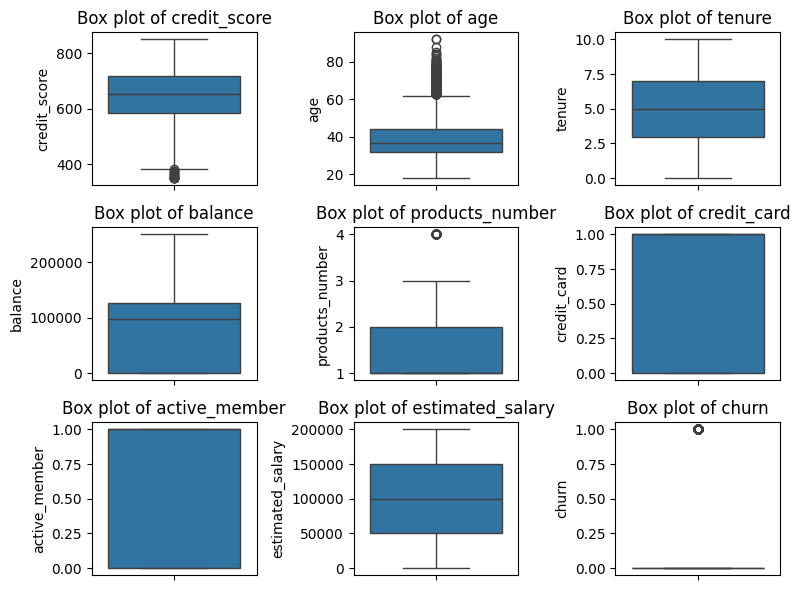

In [11]:
plt.figure(figsize=(8,6))

for i, column in enumerate(bank_churn_data.select_dtypes(include=["float64","int64"]).columns,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=bank_churn_data[column])
    plt.title(f"Box plot of {column}")

plt.tight_layout()
plt.show()

`Credit_score`/`Age`/`product_number` all have outliers:
- For `credit_score` we can see that outliers are below 400. Credit score rating is this:
    - Excellent: 800–850
    - Very Good: 740–799
    - Good: 670–739
    - Fair: 580–669
    - Poor: 300–579
    It can indicate that we have various customers in all credit score groups, but outliers fall into *Poor* category.
- `Age` outliers look feasible as customer age can vary and elder customers can easily use banking service.
- `Product_number` outliers we see that not many of customers use more than 2 products so someone using all 4 is a logical outlier.


# EDA
    Exploratory Data Analysis

### Age


Let's check how `age` compares with `churned` customers

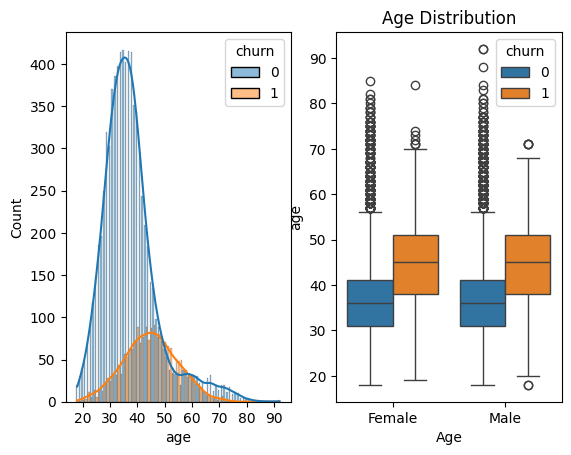

In [28]:
age_fig, age_ax = plt.subplots(1,2)
age_distribution = sns.histplot(data=bank_churn_data, x="age",
                                hue="churn",
                                bins=20,
                                multiple="dodge",
                                discrete=True,
                                stat="count",
                                kde=True,
                                ax=age_ax[0])
sns.boxplot(data=bank_churn_data, x="gender", y="age", hue="churn", ax=age_ax[1])
age_distribution.xaxis.set_major_locator(tck.MultipleLocator(10))
plt.xlabel("Age")
plt.title("Age Distribution");

We can see that majority of our customers are between age **25** and **45** while `churned` customers can be seen more in range of **35-55**.